<a href="https://colab.research.google.com/github/Sreejith-nair511/Summer_course_Ai/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating sample data...
Training data shape: (792, 10, 1)
Test data shape: (198, 10, 1)

Building LSTM model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)


Training model...
Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.1918 - val_loss: 0.0085
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0135 - val_loss: 0.0065
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0024 - val_loss: 0.0033
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0022 - val_loss: 0.0028
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0022 - val_loss: 0.0036
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0022 - val_loss: 0.0028
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16

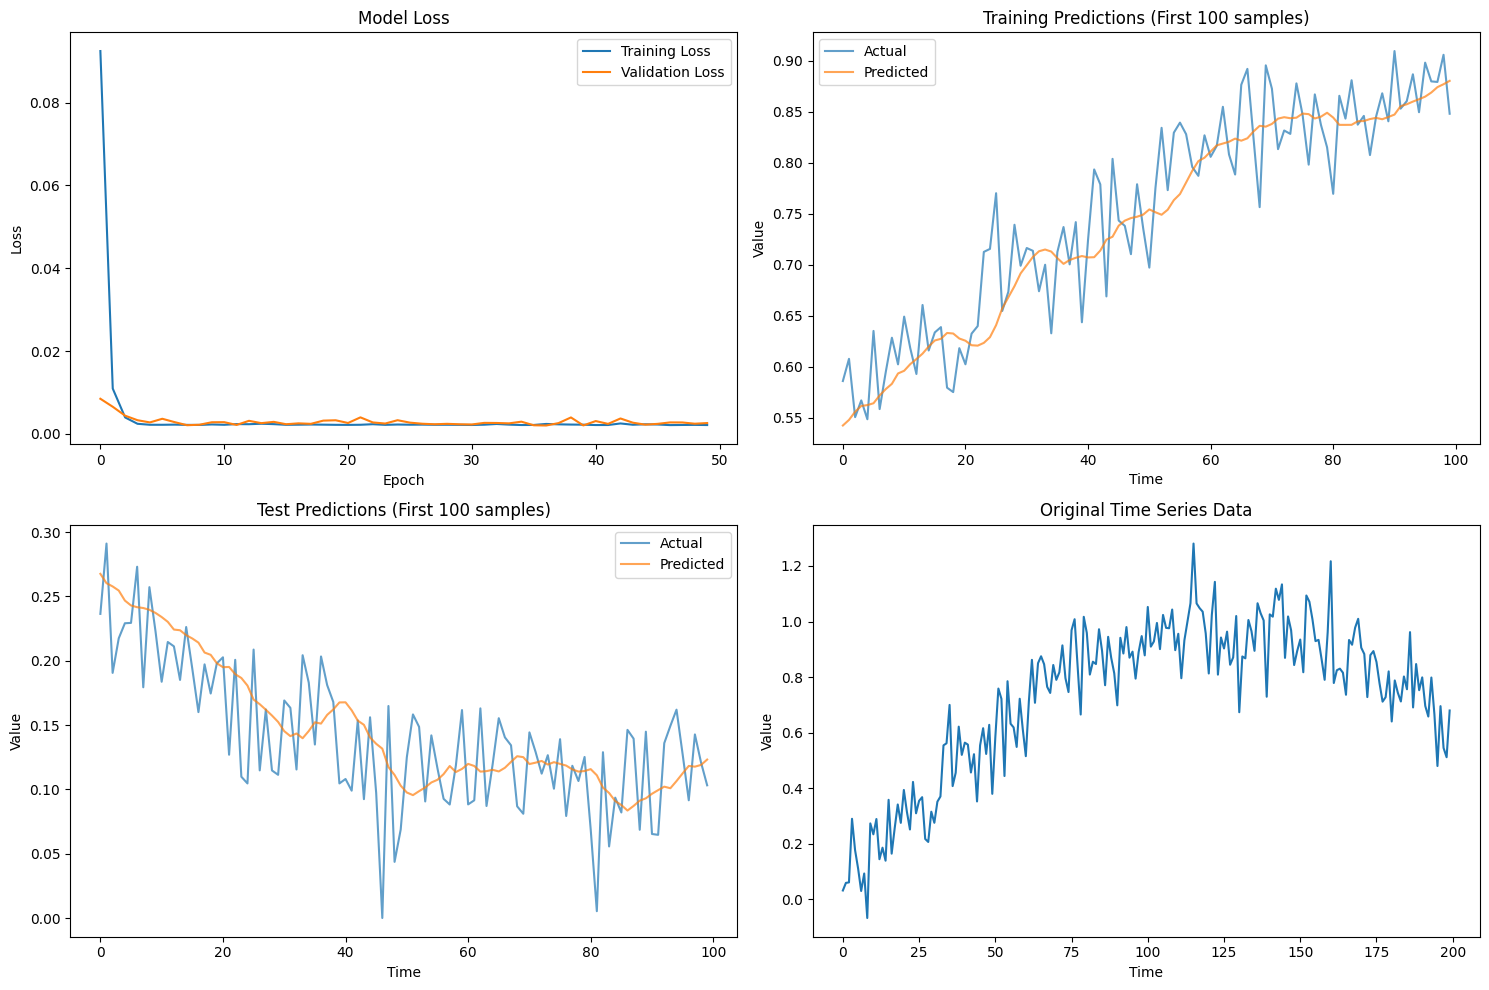


LSTM training completed!
Model is ready for further use or experimentation.


In [ ]:
# Simple LSTM Example for Google Colab
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd

# Generate sample time series data (sine wave)
def generate_data(n_samples=1000):
    """Generate synthetic time series data"""
    time = np.linspace(0, 4*np.pi, n_samples)
    data = np.sin(time) + 0.1 * np.random.randn(n_samples)
    return data

# Create sequences for LSTM
def create_sequences(data, seq_length=10):
    """Create input sequences and corresponding targets"""
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Main execution
def main():
    # Step 1: Generate and prepare data
    print("Generating sample data...")
    raw_data = generate_data(1000)

    # Normalize data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(raw_data.reshape(-1, 1)).flatten()

    # Create sequences
    sequence_length = 10
    X, y = create_sequences(scaled_data, sequence_length)

    # Split data
    split_idx = int(0.8 * len(X))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    # Reshape for LSTM (samples, timesteps, features)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    print(f"Training data shape: {X_train.shape}")
    print(f"Test data shape: {X_test.shape}")

    # Step 2: Build LSTM model
    print("\nBuilding LSTM model...")
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    model.summary()

    # Step 3: Train the model
    print("\nTraining model...")
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )

    # Step 4: Make predictions
    print("\nMaking predictions...")
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")

    # Step 5: Plot results
    plt.figure(figsize=(15, 10))

    # Plot training history
    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot predictions vs actual
    plt.subplot(2, 2, 2)
    plt.plot(y_train[:100], label='Actual', alpha=0.7)
    plt.plot(train_predictions[:100], label='Predicted', alpha=0.7)
    plt.title('Training Predictions (First 100 samples)')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(y_test[:100], label='Actual', alpha=0.7)
    plt.plot(test_predictions[:100], label='Predicted', alpha=0.7)
    plt.title('Test Predictions (First 100 samples)')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()

    # Plot original data
    plt.subplot(2, 2, 4)
    plt.plot(raw_data[:200])
    plt.title('Original Time Series Data')
    plt.xlabel('Time')
    plt.ylabel('Value')

    plt.tight_layout()
    plt.show()

    return model, history, scaler

# Run the example
if __name__ == "__main__":
    model, history, scaler = main()
    print("\nLSTM training completed!")
    print("Model is ready for further use or experimentation.")

# Example of making a single prediction
def predict_next_value(model, scaler, last_sequence):
    """Predict the next value given a sequence"""
    # Ensure the sequence is properly scaled and shaped
    scaled_seq = scaler.transform(last_sequence.reshape(-1, 1)).flatten()
    input_seq = scaled_seq.reshape(1, len(scaled_seq), 1)

    # Make prediction
    prediction = model.predict(input_seq, verbose=0)

    # Inverse transform to get actual value
    return scaler.inverse_transform(prediction)[0][0]

# Example usage after training:
# next_val = predict_next_value(model, scaler, raw_data[-10:])
# print(f"Predicted next value: {next_val}")